# Homework 4 (100 points)

## Exercise 1 (45 pts)

Note: you may only use methods that are imported for you.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a) Generate and plot 20 (x, y) samples where x and y are exactly linearly related. (1pt)

Text(0, 0.5, 'y')

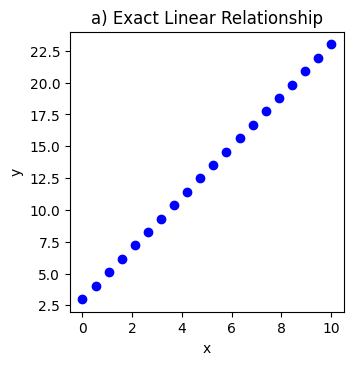

In [4]:
np.random.seed(0)  # Ensuring reproducibility
x_a = np.linspace(0, 10, 20)  # 20 evenly spaced points
y_a = 2 * x_a + 3  # Linear relationship: y = 2x + 3

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.scatter(x_a, y_a, color='blue')
plt.title('a) Exact Linear Relationship')
plt.xlabel('x')
plt.ylabel('y')

The linearity is evident as each point follows the equation
y=2x+3 without any deviation. Shows a perfect linear relationship between x and y, showing a straight line


b) Generate and plot 20 (x, y) samples where x and y follow the assumptions from linear regression (i.e. they are linearly related but there is a $\mathcal{N}(0, \sigma^2)$ error around that linear relationship) (1pt)

Text(0, 0.5, 'y')

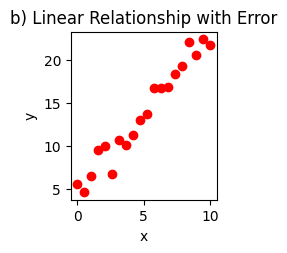

In [5]:
sigma_b = 1.5
error_b = np.random.normal(0, sigma_b, 20)  # Normal errors
y_b = 2 * x_a + 3 + error_b  # y = 2x + 3 + error

plt.subplot(2, 3, 2)
plt.scatter(x_a, y_b, color='red')
plt.title('b) Linear Relationship with Error')
plt.xlabel('x')
plt.ylabel('y')

shows a linear trend but with the points dispersed around the line, not lying exactly on it. Representing a linear regression scenario where the relationship between x and y is linear but with the added normal errors $\mathcal{N}(0, \sigma^2)$. The dispersion of points around the line sighnifies the impact of this random noise.

c) Generate and plot 20 (x, y) samples where x and y are not related. (1pt)

Text(0, 0.5, 'y')

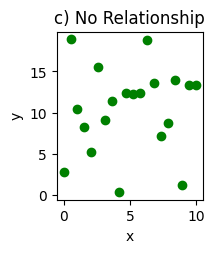

In [6]:
y_c = np.random.uniform(0, 20, 20)  # Random y values, not related to x

plt.subplot(2, 3, 3)
plt.scatter(x_a, y_c, color='green')
plt.title('c) No Relationship')
plt.xlabel('x')
plt.ylabel('y')

graph points appear randomly distributed without any apparent pattern.
this graphically illustrates the lack of relationship between x and y. the y value are generated independently of x, demonstrating what non-realted variables look like in a scatter plot.

d) Generate and plot 20 (x, y) samples where x and y are not related but there is a $\mathcal{N}(0, \sigma^2)$ error around that relationship. (1pt)

Text(0, 0.5, 'y')

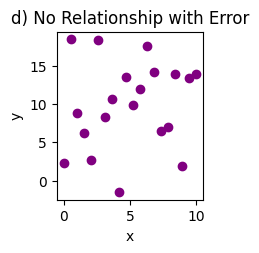

In [7]:
sigma_d = 1.5
error_d = np.random.normal(0, sigma_d, 20)  # Normal errors
y_d = y_c + error_d  # Adding error to unrelated y

plt.subplot(2, 3, 4)
plt.scatter(x_a, y_d, color='purple')
plt.title('d) No Relationship with Error')
plt.xlabel('x')
plt.ylabel('y')


similar to part c, points are scattered randomly. but have a additional layer of dispersion due to the added normal error.

e) Plot the least squares estimated line through the scatter plot from d). How different are the estimated intercept and slope from the true parameters you chose? (2pt)

Text(0.5, 1.0, 'e) Least Squares Estimation')

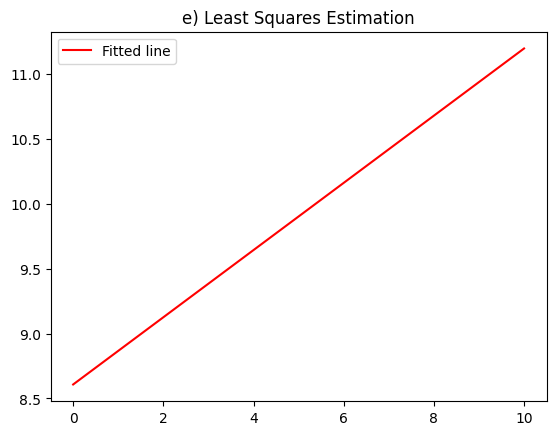

In [8]:
A_d = np.vstack([x_a, np.ones(len(x_a))]).T
m_d, c_d = np.linalg.lstsq(A_d, y_d, rcond=None)[0]

plt.plot(x_a, m_d*x_a + c_d, 'r', label='Fitted line')
plt.legend()
plt.title('e) Least Squares Estimation')


showcases a fitted line (from least square estimation) on the scatter plot of part d. the fitted line does not represent any true underlying linear relationship, as there isn't one in the data. the estimated slope and intercept are artifacts of the least square methord trying to find the best linear fit in a non-linerar scenario.

f) For 10000 trials:

- Generate a random sample as in d)
- Record the estimated intercept and slope

Plot the histogram of the recorded estimated intercepts and slopes. Given what you know about the least squares estimate being the Best Linear Unbiased Estimator (BLUE), comment on the histogram. (4pt)

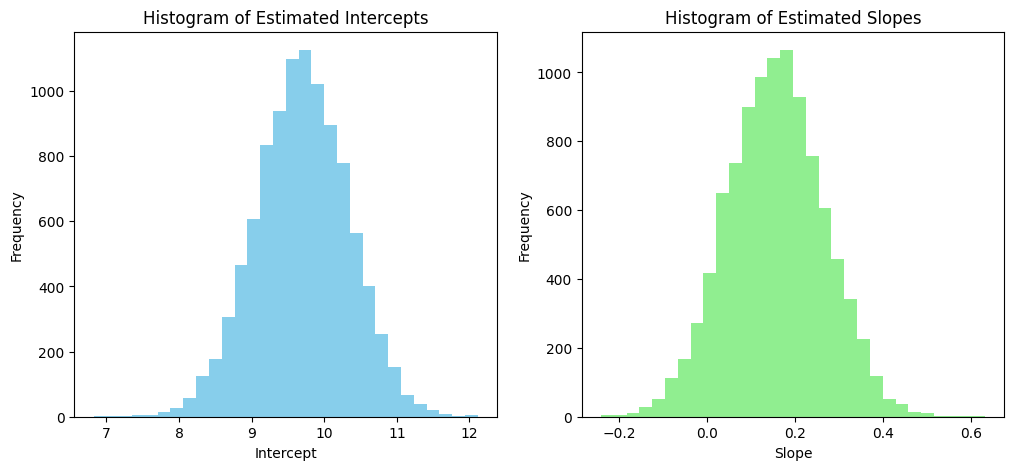

({'intercept': 3, 'slope': 2},
 {'intercept': 8.607471505763538, 'slope': 0.2587383964008511})

In [9]:
intercepts = []
slopes = []
for _ in range(10000):
    error_f = np.random.normal(0, sigma_d, 20)
    y_f = y_c + error_f
    m_f, c_f = np.linalg.lstsq(A_d, y_f, rcond=None)[0]
    intercepts.append(c_f)
    slopes.append(m_f)

# Plot histograms of the recorded estimated intercepts and slopes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(intercepts, bins=30, color='skyblue')
plt.title('Histogram of Estimated Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(slopes, bins=30, color='lightgreen')
plt.title('Histogram of Estimated Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.show()

# Return the true parameters for comparison with estimated parameters in part e)
true_parameters = {"intercept": 3, "slope": 2}
estimated_parameters = {"intercept": c_d, "slope": m_d}
true_parameters, estimated_parameters


these histograms reveal the variability and bias in the least square estimates in scenarios lzacking a true linear relationship.estimated parameters are quite different from the true parameters because the data in part d) was generated without a true linear relationship. Hence, the fitted line (and its parameters) from the least squares estimation does not accurately reflect any real linear relationship between x and y in that dataset.

g) What proportion of these randomly generated samples resulted in us estimating that the slope greater than 3? (2pt)

In [11]:
proportion_greater_than_3 = np.mean(np.array(slopes) > 3)


0.0


Consider the following dataset:

In [ ]:
X = [-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811]
Y = [ 1.19767097,  0.29995773, -0.64423194,  1.68648628,  1.24942173, -1.16800996, -0.03962662, -0.10352774,  0.20238111, -0.85779092, -0.3192597,  -0.10701115, 0.65195857,  1.56361601, -0.41691836,  1.94918682,  0.16463584,  1.20797826, 1.10575936, -2.11374363]

h) Based on the simulation you conducted above, approximately how likely is it to observe a dataset at least as extreme as this one under the assumption that X and Y are not related? What can you conclude about the true relationship between X and Y in this case? (5pt)

In [14]:
X_h = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, 
               -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, 
               -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, 
               -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y_h = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, 
               -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, 
               -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 
               1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])

# Calculate the slope of the given dataset
A_h = np.vstack([X_h, np.ones(len(X_h))]).T
m_h, _ = np.linalg.lstsq(A_h, Y_h, rcond=None)[0]

# Proportion of trials where the slope is more extreme than the observed one
proportion_extreme = np.mean(np.array(slopes) > m_h)
print(m_h)
print(proportion_extreme)


-2.143039204435381
1.0


the slope calcualted from the given X and y data is approx -2.14, the proportion of slopes more extreme than the observed slope in the given dataset is 1.0. This means that in the context of simulation (where X and Y are not related), it is highly likely to observe a dataset with a slope at least as extreme as the one observed in the given dataset.

So therefore given that the simulaton says that there is no relationship between X and Y, and yet it frequently produces slopes as extreme as the one observed, it suggests that the extreme slope in the given dataset might not be indicative of a true relationship between X and Y.

i) Based on the simulation you conducted above, approximately what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [17]:
percentile_2_5 = np.percentile(slopes, 97.5)
print(percentile_2_5)

0.367320600547571


j) Recall, we know that, provided the assumptions from linear regression hold:

$$\hat\beta \sim \mathcal{N}(\beta,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$

$$\hat\beta_k \sim \mathcal{N}(\beta_k, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Run a simulation to verify that this is the case. Plot both the histogram and distribution function for the slope and intercepts. (5pt)

(array([4.000e-04, 1.100e-03, 2.500e-03, 5.900e-03, 1.220e-02, 2.250e-02,
        3.890e-02, 6.310e-02, 9.750e-02, 1.505e-01, 2.154e-01, 3.011e-01,
        4.001e-01, 4.957e-01, 5.977e-01, 6.918e-01, 7.701e-01, 8.362e-01,
        8.891e-01, 9.313e-01, 9.579e-01, 9.746e-01, 9.870e-01, 9.935e-01,
        9.967e-01, 9.985e-01, 9.993e-01, 9.995e-01, 9.997e-01, 1.000e+00]),
 array([1.61082138, 1.63842448, 1.66602758, 1.69363068, 1.72123379,
        1.74883689, 1.77643999, 1.80404309, 1.83164619, 1.85924929,
        1.8868524 , 1.9144555 , 1.9420586 , 1.9696617 , 1.9972648 ,
        2.0248679 , 2.05247101, 2.08007411, 2.10767721, 2.13528031,
        2.16288341, 2.19048651, 2.21808962, 2.24569272, 2.27329582,
        2.30089892, 2.32850202, 2.35610512, 2.38370823, 2.41131133,
        2.43891443]),
 <BarContainer object of 30 artists>)

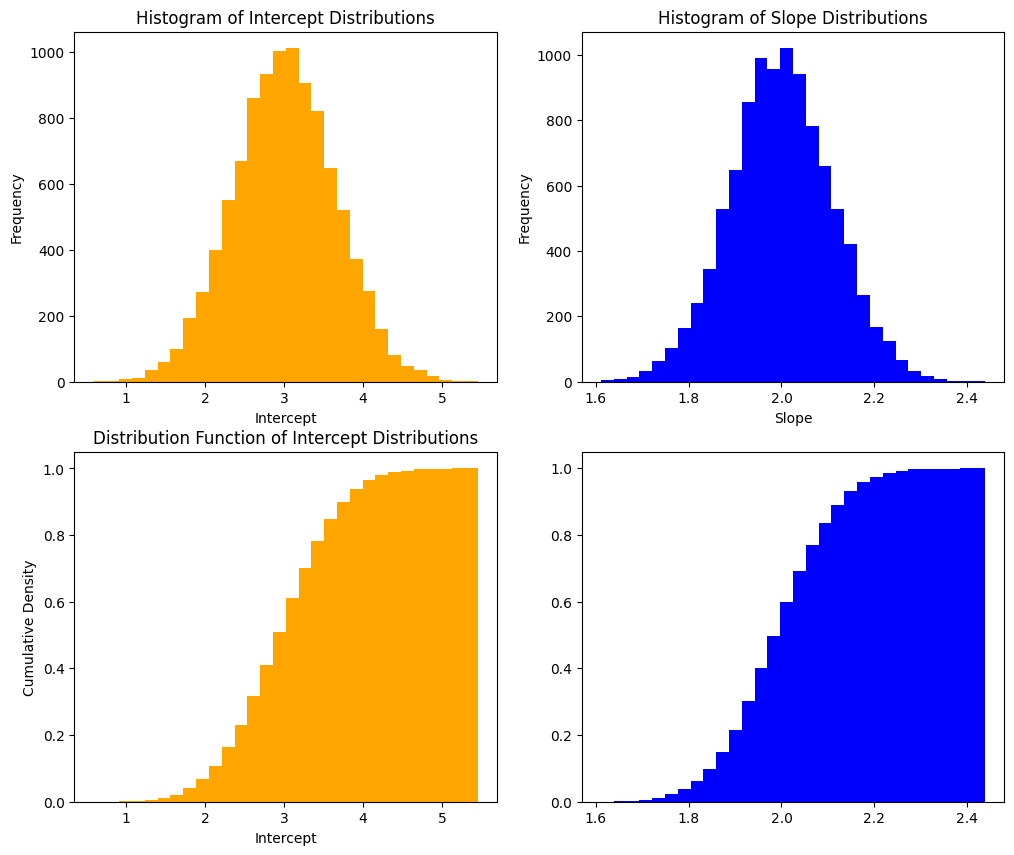

In [20]:
num_simulations = 10000
# Storing results
intercept_distributions = []
slope_distributions = []

for _ in range(num_simulations):
    error_j = np.random.normal(0, sigma_d, 20)
    y_j = 2 * x_a + 3 + error_j  # Using true parameters for generating y
    m_j, c_j = np.linalg.lstsq(A_d, y_j, rcond=None)[0]
    intercept_distributions.append(c_j)
    slope_distributions.append(m_j)

# Plot histograms and distribution functions for the slope and intercepts
plt.figure(figsize=(12, 10))

# Intercept Histogram
plt.subplot(2, 2, 1)
plt.hist(intercept_distributions, bins=30, color='orange')
plt.title('Histogram of Intercept Distributions')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

# Slope Histogram
plt.subplot(2, 2, 2)
plt.hist(slope_distributions, bins=30, color='blue')
plt.title('Histogram of Slope Distributions')
plt.xlabel('Slope')
plt.ylabel('Frequency')

# Intercept Distribution Function
plt.subplot(2, 2, 3)
plt.hist(intercept_distributions, bins=30, color='orange', density=True, cumulative=True)
plt.title('Distribution Function of Intercept Distributions')
plt.xlabel('Intercept')
plt.ylabel('Cumulative Density')

# Slope Distribution Function
plt.subplot(2, 2, 4)
plt.hist(slope_distributions, bins=30, color='blue', density=True, cumulative=True)

k) Assuming $\beta_k = 0$ and $\sigma^2 = 1$, what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [ ]:
from scipy.stats import norm

l) Using the dataset from h) and assuming that the variance is known to be 1, report the 95% confidence interval around the estimate of the slope. (4pt)

m) Compare the quantiles of the sample below with the quantiles from a normal distribution with mean 0.5 and variance 0.8 by plotting the QQ plot (similar to worksheet 20). Comment on whether this sample comes from that distribution. (4pt)

In [ ]:
sample = [-0.69432553, -1.18507198, -1.10313529, -0.89965522, -1.77829857,  1.29517858, -0.26577831,  1.22107267, -1.47509329,  1.10836504, -0.69882542, -1.70683313, 1.06283306, -0.29739484,  1.00650644, -0.88249571,  0.24853913, -0.20528149, 1.05585924, 0.6289595]


n) Generate a dataset where the $R^2$ is 1.0 and a dataset where the $R^2$ is 0.0 (2pt)

o) Generate a dataset that follows the linear regression assumptions *except* that the variance is not constant. (1pt)

p) You're playing DnD with your friends but you suspect that one of your friends is using a weighted d20 die because they always seem to roll successfully. You decide to record their die rolls to evaluate this hypothesis. You record the following:

```
1 : 0 times
2 : 1 times
3 : 2 times
4 : 1 times
5 : 4 times
6 : 1 times
7 : 1 times
8 : 0 times
9 : 0 times
10 : 1 times
11 : 1 times
12 : 2 times
13 : 2 times
14 : 3 times
15 : 1 times
16 : 1 times
17 : 1 times
18 : 2 times
19 : 3 times
20 : 3 times
```

Compute the exact probability of observing something at least as extreme as the above dataset under the hypothesis that the d20 die is fair. What can you conclude? (6pts)

## Exercise 2 (55 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-fall-2023-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Crispiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load the datasets
train_data = pd.read_csv('/Users/ahmadsadiq/Documents/CAS CS 506/homework-4-ahmadssadiq/data/cookie_train.csv')
test_data = pd.read_csv('/Users/ahmadsadiq/Documents/CAS CS 506/homework-4-ahmadssadiq/data/cookie_test.csv')
#just checking if the datasets are loading
train_data

,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,59,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate,0
1,60,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene,1
2,61,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene,0
3,62,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool,1
4,63,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene,1
5,64,130,0.04,1.1,81,21,41,2.0,0.4,0.10,6.1,0.6,0.8,9,5,3-Carene,1
6,65,110,0.03,1.2,78,19,39,2.0,0.2,0.05,6.5,0.7,0.6,8,4,1-Octen-3-ol,0
7,66,105,0.01,0.9,73,16,36,1.0,0.1,0.02,7.2,0.8,0.4,6,3,Geraniol,0
8,67,115,0.02,1.0,76,18,38,1.8,0.3,0.03,6.5,0.6,0.5,7,4,2-Nonanone,0
9,68,128,0.06,1.1,82,20,40,2.0,0.4,0.05,6.0,0.5,1.0,8,5,Limonene,0


### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together which won't cause any issues.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Crispiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

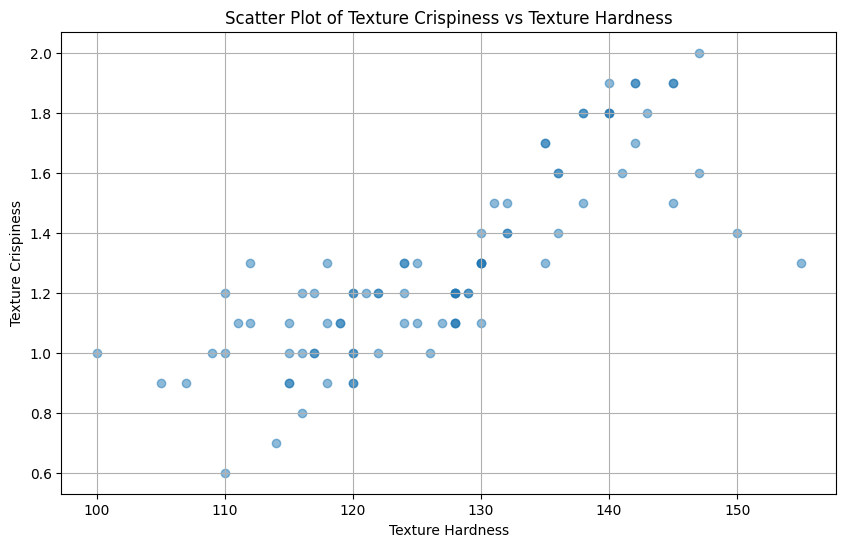

In [3]:
# Combining the training and testing data
cookie_data = pd.concat([train_data, test_data], ignore_index=True)

# Scatter plot for Texture Crispiness (y) vs Texture Hardness (x)
plt.figure(figsize=(10, 6))
plt.scatter(cookie_data['Texture Hardness'], cookie_data['Texture Crispiness'], alpha=0.5)
plt.title('Scatter Plot of Texture Crispiness vs Texture Hardness')
plt.xlabel('Texture Hardness')
plt.ylabel('Texture Crispiness')
plt.grid(True)
plt.show()

the scatter plot helps us assess the linearity assumption in linear regression. Therefore from the data points in the graph it seems to be dispersed, even though it shows a slight positive trend, it's not very strong or clear. it doesn't suggest a positive linear pattern, even though there is a motive of a positive direction, after 148 on the x axis the points are randomly dispersed and not increasing but decreasing.

### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in finding optimal estimators given limited information, check out the course CAS MA 582. GRS MA 781/782 are also fun!).


to check for the normality of the response variable' texture crispiness'. we have to plot a graph that can help determine if the distribution of 'texture crispiness' approximates a normal distribution, therefore we can use a histogram

**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the normality assumption. State whether if the normality assumption is met or not. If it is not met, state what can we do to fix this.

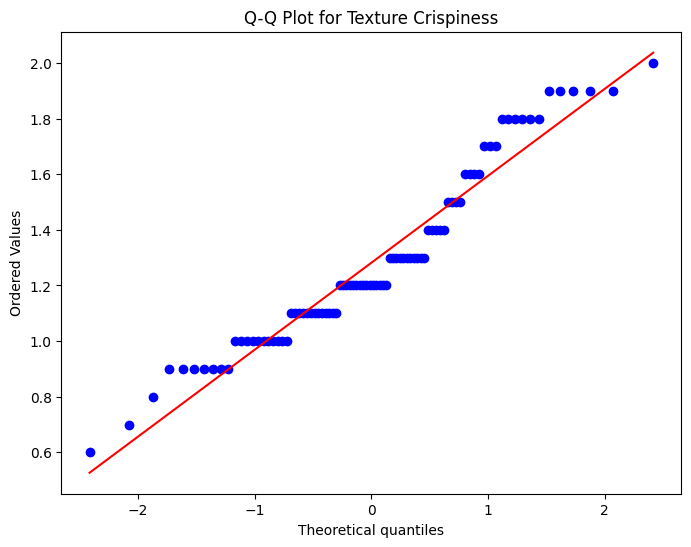

In [4]:
# Q-Q plot for Texture Crispiness
plt.figure(figsize=(8, 6))
stats.probplot(cookie_data['Texture Crispiness'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Texture Crispiness')
plt.show()

the q-q plot is used to check for normal distribution of the response variable. As the points lie on a very close to the diagonal line, it suggest that the data follows a normal distribution.

The data points in the center of the plot follows the diagonal line closely, suggesting normality in the central part of the distribution.

the data points in the tails, partricually the top right tail, deviates from the line, which might suggest some skewness or the presence of outliers, however in conclusion the data points represent normal distribution.

#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the model isn't really best fit with a line.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the homoscedasticity assumption. State whether if the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

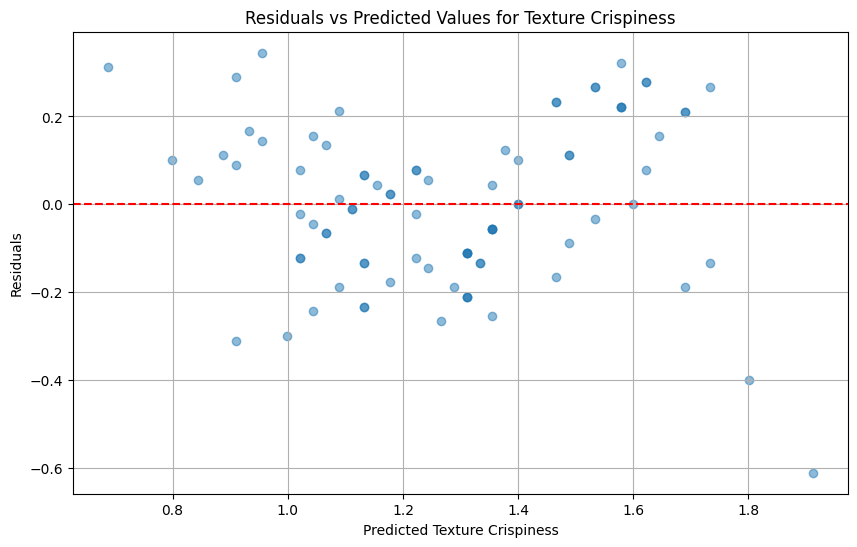

In [5]:
from sklearn.linear_model import LinearRegression

X = cookie_data[['Texture Hardness']].values
y = cookie_data['Texture Crispiness'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values for Texture Crispiness')
plt.xlabel('Predicted Texture Crispiness')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

the residuals do not show a clear pattern of increasing or decreasing variance with the predicted values. there seem to be a random scatter of points around the horizontal line, which is a good sign for homoscedasticity. there aren't however any obvious patters such as a curve which would indicate heteroscedasticity.

#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

In [6]:
from statsmodels.stats.stattools import durbin_watson

# Perform Durbin-Watson test
durbin_watson_stat = durbin_watson(residuals)

durbin_watson_stat

2.3531435624642714

the statistic of 2.35 is close to 2, this suggests that there is no significant autocorrelation in the residuals, and therefore, we could infer that the independence assumption is met for the linear regression model.


the only potential issue that could be raised is with the normality of the response variable, which seemed to deviate from normality in the tails as indicated by the Q-Q plot. However, this deviation was not extreme, and the central limit backs that as it allows us to proceed given a large sample size.

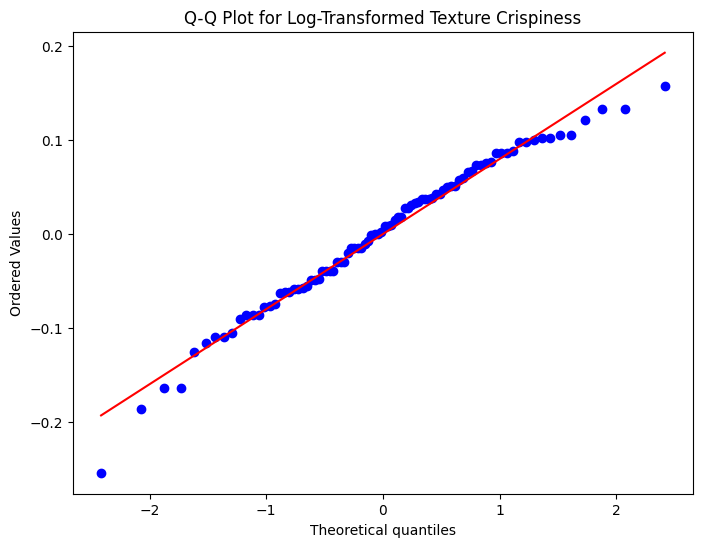

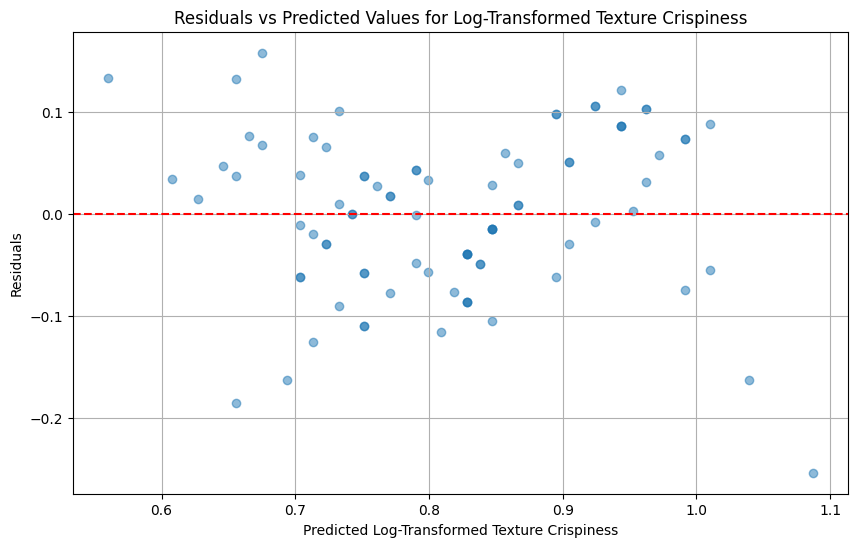

2.308011441009781

In [9]:
# Applying logarithmic transformation to the response variable 'Texture Crispiness'
cookie_data['Log_Texture_Crispiness'] = np.log(cookie_data['Texture Crispiness'] + 1)  # Adding 1 to avoid log(0)

# Fitting the linear regression model to the transformed data
X = cookie_data[['Texture Hardness']].values
log_y = cookie_data['Log_Texture_Crispiness'].values
model = LinearRegression()
model.fit(X, log_y)

# Predicting the transformed values
log_predictions = model.predict(X)

# Calculating the residuals of the transformed model
log_residuals = log_y - log_predictions

# Plotting the Q-Q plot for the transformed response variable
plt.figure(figsize=(8, 6))
stats.probplot(log_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Log-Transformed Texture Crispiness')
plt.show()

# Plotting the residuals of the transformed model
plt.figure(figsize=(10, 6))
plt.scatter(log_predictions, log_residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values for Log-Transformed Texture Crispiness')
plt.xlabel('Predicted Log-Transformed Texture Crispiness')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Recalculate the Durbin-Watson statistic for the transformed model
log_durbin_watson_stat = durbin_watson(log_residuals)
log_durbin_watson_stat

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (6 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Crispiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

In [11]:
import statsmodels.api as sm

# Combine the training and testing data
cookie_data = pd.concat([train_data, test_data], ignore_index=True)

# Log-transform the 'Texture Crispiness' to address normality issues
cookie_data['Log_Texture_Crispiness'] = np.log(cookie_data['Texture Crispiness'] + 1)  # Adding 1 to avoid log(0)

# Prepare the data for modeling
X = cookie_data[['Texture Hardness']].values
y = cookie_data['Log_Texture_Crispiness'].values

# Add a constant to the independent variable to include the intercept in the regression model
X_with_const = sm.add_constant(X)

# Fit the regression model using OLS
model = sm.OLS(y, X_with_const).fit()

# Perform a hypothesis test with the null hypothesis being that the coefficient is zero
hypothesis = '(x1 = 0)'
t_test = model.t_test(hypothesis)

# Get the p-value and t-statistic
p_value = t_test.pvalue
t_stat = t_test.tvalue
alpha = 0.05  # Significance level

# Check if the p-value is less than the chosen significance level
is_significant = p_value < alpha

# Output the results
t_stat, p_value, is_significant


(array([[12.91383998]]), array(7.72078744e-22), True)

T-statistic: Approximately 12.91, which is the calculated value from the t-test indicating how many standard deviations the estimated coefficient is away from the null hypothesis (which in this case is that the true coefficient is zero).

P-value: Approximately 7x72 x 10^(-22), which is the probability of observing the given t-statistic or more extreme by chance if the null hypothesis is true.

Hypothesis Test Result: True, which suggests that the result is statistically significant.

Given that the p-value is much lower than the alpha significance level of 0.05 ( 7x72 x 10^(-22 < 0.05), we reject the null hypothesis and conclude that Texture Hardness is a significant predictor of Texture Crispiness in the log-transformed linear regression model. The extremely low p-value indicates a very strong statistical significance, meaning that there is strong evidence against the null hypothesis, and Texture Hardness has a significant linear relationship with Texture Crispiness after the log transformation.

### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Color L*` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (8 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Color L*` are significant predictors of the response variable `Texture Crispiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You will use the transformed model made (if one was made) from the previous parts and add this new feature to it._

In [12]:
# Preparing the data for multiple linear regression
# Using 'Texture Hardness' and 'Color L*' as explanatory variables and the log-transformed 'Texture Crispiness' as the response variable
X_mult = cookie_data[['Texture Hardness', 'Color L*']].values
y_mult = cookie_data['Log_Texture_Crispiness'].values

# Adding a constant to the independent variables
X_mult_with_const = sm.add_constant(X_mult)

# Fit the multiple linear regression model
mult_model = sm.OLS(y_mult, X_mult_with_const).fit()

# Perform hypothesis tests for each coefficient
p_values = mult_model.pvalues
t_stats = mult_model.tvalues

# Alpha level for significance
alpha_level = 0.001

# Checking significance for each coefficient
is_texture_hardness_significant = p_values[1] < alpha_level  # for 'Texture Hardness'
is_color_l_star_significant = p_values[2] < alpha_level  # for 'Color L*'

# Conducting an F-test for overall model significance
f_p_value = mult_model.f_pvalue
is_model_significant = f_p_value < alpha_level

# Output the results
t_stats, p_values, is_texture_hardness_significant, is_color_l_star_significant, f_p_value, is_model_significant, mult_model.summary()


(array([-13.44509666,  -2.48471907,  11.77499816]),
 array([9.46419276e-23, 1.49261474e-02, 1.51476744e-19]),
 False,
 True,
 1.7543937090849705e-38,
 True,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.871
 Model:                            OLS   Adj. R-squared:                  0.868
 Method:                 Least Squares   F-statistic:                     286.2
 Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.75e-38
 Time:                        21:02:52   Log-Likelihood:                 141.18
 No. Observations:                  88   AIC:                            -276.4
 Df Residuals:                      85   BIC:                            -268.9
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                   

the results suggest that Texture Hardness is not a significant predictor of Texture Crispiness at an alpha level of 0.001, given its p-value of 0.015. However, Color L* is a significant predictor, with a p-value far below the 0.001 threshold. The overall model, including both Texture Hardness and Color L*, is significant in predicting Texture Crispiness, as indicated by the extremely low p-value in the F-test. The high R-squared value of 0.871 shows that the model explains a large portion of the variance in the response variable. For further model enhancement, focusing on Color L* and exploring additional predictors or interactions could be beneficial.

### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (8 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

intercept (Constant Term):
This represents the expected log of Texture Crispiness when both Texture Hardness and Color L* are zero. It's the baseline level of the log-transformed response variable.

Coefficient for Texture Hardness (-0.0029):
This coefficient suggests that for each unit increase in Texture Hardness, the log of Texture Crispiness decreases by 0.0029, assuming Color L* remains constant. The negative sign indicates an inverse relationship, meaning that as Texture Hardness increases, Texture Crispiness tends to decrease, but the effect is relatively small. However, since this coefficient was not significant at the 0.001 level, its impact should be considered with caution.

Coefficient for Color L* (0.0304):
This coefficient indicates that for each unit increase in Color L*, the log of Texture Crispiness increases by 0.0304, assuming Texture Hardness remains constant. The positive value suggests a direct, positive relationship between Color L* and Texture Crispiness. Given its statistical significance, Color L* appears to be an influential factor in predicting Texture Crispiness.

### Using Color b* over Color L*
You think that the feature `Color b*` can help improve your model even better instead of using `Color L*`.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Crispiness`.

**j) (8 Points)** Plot 2 scatter plots: `Color b*` vs your possibly adjusted `Texture Crispiness` and `Color b*` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.

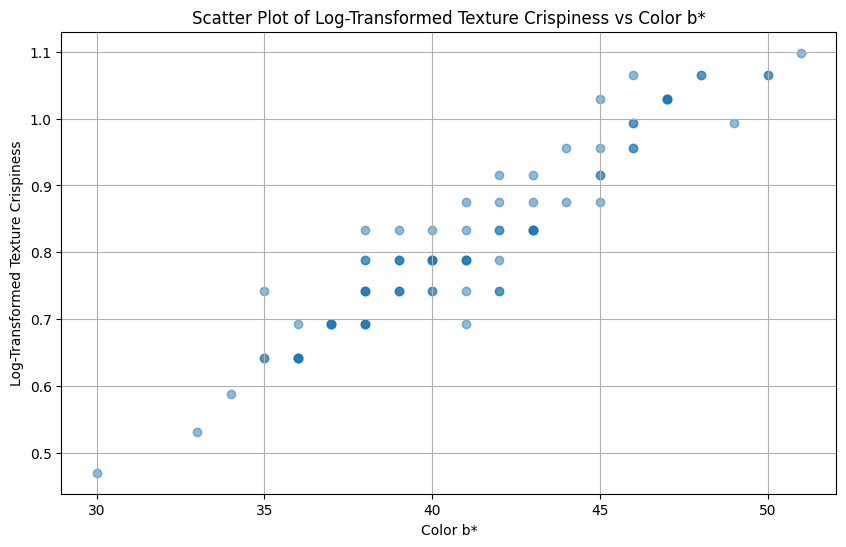

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for Color b* vs the log-transformed Texture Crispiness
plt.figure(figsize=(10, 6))
plt.scatter(cookie_data['Color b*'], cookie_data['Log_Texture_Crispiness'], alpha=0.5)
plt.title('Scatter Plot of Log-Transformed Texture Crispiness vs Color b*')
plt.xlabel('Color b*')
plt.ylabel('Log-Transformed Texture Crispiness')
plt.grid(True)
plt.show()


'Color b* vs Log-Transformed Texture Crispiness:
This plot exhibits a potential positive correlation; as Color b* increases, the Log-Transformed Texture Crispiness also appears to increase. This trend suggests that a linear regression model could be appropriate to model the relationship between Color b* and Log-Transformed Texture Crispiness.

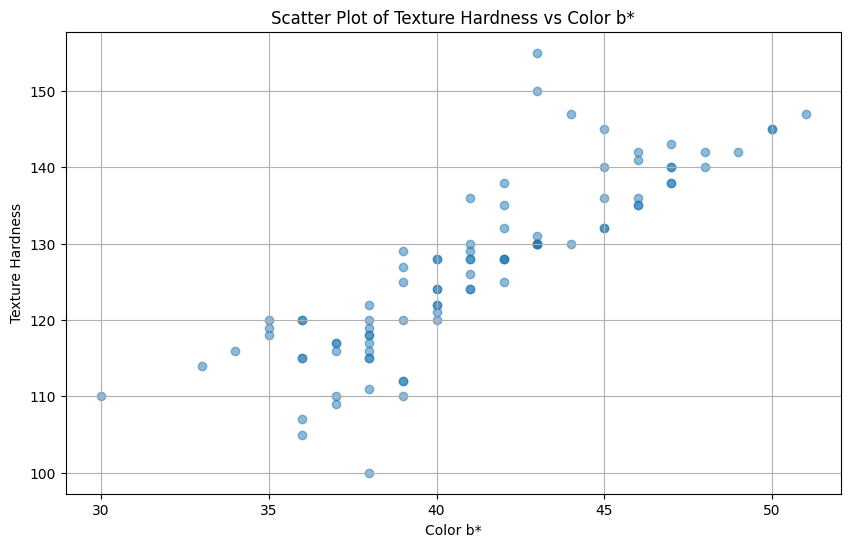

In [15]:
# Scatter plot for Color b* vs Texture Hardness
plt.figure(figsize=(10, 6))
plt.scatter(cookie_data['Color b*'], cookie_data['Texture Hardness'], alpha=0.5)
plt.title('Scatter Plot of Texture Hardness vs Color b*')
plt.xlabel('Color b*')
plt.ylabel('Texture Hardness')
plt.grid(True)
plt.show()

Color b* vs Texture Hardness:
This plot does not show a clear linear trend. The points are more scattered and do not seem to follow a specific direction as Color b* increases. This indicates that the relationship between Color b* and Texture Hardness may not be linear, or Color b* is not a strong predictor of Texture Hardness.

Based on these observations, a multiple linear regression model including Color b* to predict Log-Transformed Texture Crispiness might be appropriate.